
--- Classification Report ---
                precision    recall  f1-score   support

bargain_hunter       0.61      0.92      0.73        12
 premium_buyer       0.50      0.12      0.20         8

      accuracy                           0.60        20
     macro avg       0.56      0.52      0.47        20
  weighted avg       0.57      0.60      0.52        20

Accuracy : 0.60
Precision: 0.50
Recall   : 0.12


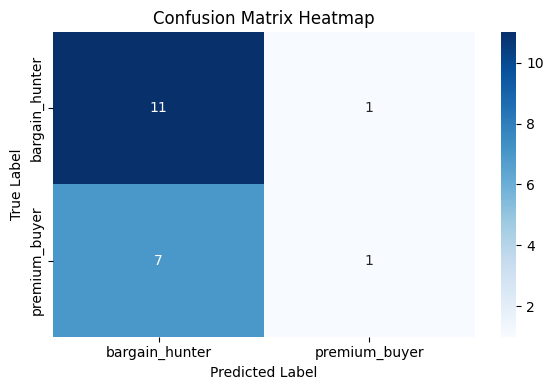

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

# Load data
df = pd.read_csv("/content/customer_behavior.csv")  # Make sure this CSV is in the same directory

# Encode buyer_type: 'bargain_hunter' -> 0, 'premium_buyer' -> 1
label_encoder = LabelEncoder()
df['buyer_type_encoded'] = label_encoder.fit_transform(df['buyer_type'])

# Features and target
X = df[['total_spent', 'avg_purchase_value', 'visits_per_month']]
y = df['buyer_type_encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
class_names = label_encoder.classes_

# Print evaluation
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=class_names))
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.tight_layout()
plt.show()

